<a href="https://colab.research.google.com/github/irmakkoseoglu/Turkey-vs-Germany/blob/main/analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏙️ Turkey vs Germany: Cost of Living Comparison (2024)

This notebook analyzes and compares the **cost of living** between **Turkey** and **Germany** using Numbeo's 2024 data.

---

## 🔐 Step 1: Upload Kaggle API Key

To access Kaggle datasets programmatically, you need to upload your `kaggle.json` file, which contains your personal Kaggle API credentials.

📌 You can download this file from your [Kaggle account settings](https://www.kaggle.com/account).

> This code will prompt you to upload the file manually.

In [13]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rmakkoseoglu","key":"44ffd2a18f08cc53d602047f2c16037e"}'}

## ⚙️ Step 2: Configure Kaggle Credentials

Now that you've uploaded `kaggle.json`, you need to move it to the correct location so that the Kaggle CLI can find and use it.

- `mkdir -p ~/.kaggle`: Creates the hidden `.kaggle` directory in your home folder if it doesn't already exist.
- `cp kaggle.json ~/.kaggle/`: Copies the uploaded file into that directory.
- `chmod 600`: Sets file permissions so that only you can read/write the file (for security).

In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


## 📦 Step 3: Install Kaggle API Library

In order to access and download datasets from Kaggle within Colab, we need to install the official `kaggle` Python package.


In [15]:
!pip install kaggle


## 📥 Step 4: Download the Dataset from Kaggle

Now that the Kaggle API is configured, we can download the dataset we’ll be analyzing.

- This dataset contains cost of living indices for countries worldwide, based on Numbeo’s 2024 data.


In [16]:
!kaggle datasets download -d myrios/cost-of-living-index-by-country-by-number-2024


Dataset URL: https://www.kaggle.com/datasets/myrios/cost-of-living-index-by-country-by-number-2024
License(s): other
cost-of-living-index-by-country-by-number-2024.zip: Skipping, found more recently modified local copy (use --force to force download)


## 📂 Step 5: Unzip the Downloaded Dataset

The dataset was downloaded as a `.zip` file. We now need to extract its contents so we can read the data with pandas or other tools.


In [17]:
!unzip cost-of-living-index-by-country-by-number-2024.zip


Archive:  cost-of-living-index-by-country-by-number-2024.zip
replace Cost_of_Living_Index_by_Country_2024.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## 📊 Step 6: Load the Dataset into a DataFrame

Now that we have the dataset extracted, we can load it into a `pandas` DataFrame for further analysis.


In [19]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("Cost_of_Living_Index_by_Country_2024.csv")

# Display the first 5 rows of the dataset
df.head()


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


All cost-related indices (e.g., Rent Index, Groceries Index) are relative to New York City (value = 100).
For example, a Rent Index of 25 means rents in that country are 25% of New York City rents on average.

## 🔎 Step 7: Filter Data for Germany and Turkey

We now filter the data to only include **Germany** and **Turkey** for comparison.

- `df[df['Country'].isin(['Germany', 'Turkey'])]`: Filters the dataset to only include rows for Germany and Turkey.
- `df_filtered.set_index('Country')`: Sets the "Country" column as the index for easier comparison.

We then use `.T` to transpose the DataFrame, making it easier to compare the countries side-by-side.


In [20]:
# Filter data for Germany and Turkey
df_filtered = df[df['Country'].isin(['Germany', 'Turkey'])]

# Set "Country" as the index
df_filtered = df_filtered.set_index('Country')

# Transpose the DataFrame for easier comparison
df_filtered.T


Country,Germany,Turkey
Rank,21.0,70.0
Cost of Living Index,62.2,37.4
Rent Index,24.4,13.2
Cost of Living Plus Rent Index,44.0,25.8
Groceries Index,60.8,37.6
Restaurant Price Index,52.8,30.7
Local Purchasing Power Index,120.2,49.0


## 📊 Step 8: Visualize the Cost of Living Comparison

We now create a bar chart to visualize the **cost of living comparison** between **Germany** and **Turkey** for 2024.

- `df_filtered.T.plot(kind='bar', figsize=(15, 6))`: Plots the transposed DataFrame as a bar chart.
- We customize the plot by adding a title, rotating x-ticks for better readability, and enabling grid lines for clarity.


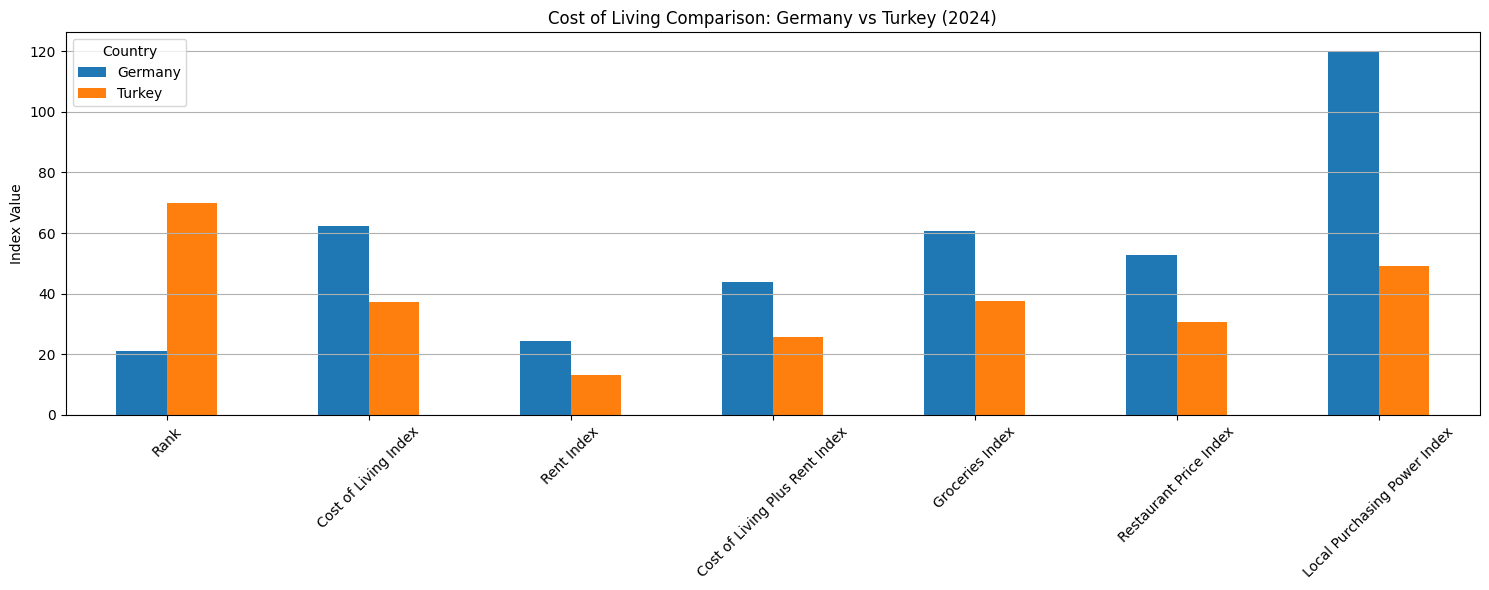

In [21]:
import matplotlib.pyplot as plt

# Plot the transposed DataFrame as a bar chart
df_filtered.T.plot(kind='bar', figsize=(15, 6))

# Customize the chart
plt.title('Cost of Living Comparison: Germany vs Turkey (2024)')
plt.ylabel('Index Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


This chart will help us visually compare the cost of living indices for Germany and Turkey across various categories like rent, groceries, etc.


📊 Step 9: Detailed Comparison on Key Metrics
In this step, we focus on comparing the following key metrics:


*   Cost of Living Index
*   Rent Index
*   Restaurant Price Index
*   Groceries Index
*   Local Purchasing Power Index



By selecting only these columns of interest, we can get a more detailed view of the differences in cost of living between Germany and Turkey. Instead of static bar charts, we are using interactive bar charts to make it easier for us to explore the data. This allows for a more dynamic and user-friendly comparison.

In [27]:
import plotly.express as px

# List of key metrics to focus on
columns_of_interest = [
    'Cost of Living Index',
    'Rent Index',
    'Restaurant Price Index',
    'Groceries Index',
    'Local Purchasing Power Index'
]

# Plot the selected metrics for a detailed comparison with Plotly
fig = px.bar(df_filtered[columns_of_interest].T,
             title='Detailed Cost Comparison: Germany vs Turkey',
             labels={'value': 'Index Value', 'index': 'Metric'},
              color_discrete_sequence=px.colors.qualitative.Set2) # Using 'Set2' colormap

# Customize the plot
fig.update_layout(
    xaxis_title='Metric',
    yaxis_title='Index Value',
    barmode='group',
    xaxis_tickangle=-45
)

# Show the interactive plot
fig.show()
